In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, validation_curve, StratifiedShuffleSplit
from sklearn import metrics

In [ ]:
featuresMIC = pd.read_csv('featuresRankedMIC_550.csv')
featuresFC = pd.read_csv('featuresRankedFC_550.csv')
featuresRFC = pd.read_csv('featuresRankedRFC_550.csv')

# Mutual Information Gain

In [ ]:
X = featuresMIC.iloc[:,0:20]
y = featuresMIC['Playoffs']

In [ ]:
featuresMIC.iloc[:,0:20].head()

,ERA+,OPS+,RA/G,1Run,SV,R/G,BB_P,#a-tA-S,Under500,DefEff,PA,Rtot,H_P,SOS,WP,PAge,2B,BB,LOB,HR_P
0,0.173913,0.44,0.477612,0.559387,0.302094,0.339394,0.429180,0.45,0.402703,0.602041,0.594126,0.391473,0.622353,0.545455,0.687796,0.405941,0.151402,0.465585,0.695640,0.418914
1,0.637681,0.32,0.000000,0.390805,0.194577,0.133333,0.154861,0.65,0.389189,1.000000,0.356231,0.841085,0.181001,0.454545,0.262041,0.465347,0.191710,0.410213,0.400425,0.123964
2,0.231884,0.56,0.300995,0.641762,0.265422,0.363636,0.429180,0.75,0.385135,0.581633,0.523644,0.372093,0.464920,0.454545,0.221357,0.475248,0.361411,0.440077,0.555105,0.189573
3,0.275362,0.36,0.161692,0.618774,0.100396,0.000000,0.688073,0.40,0.271622,0.867347,0.279588,0.569767,0.159225,0.454545,0.435667,0.336634,0.078143,0.021753,0.387544,0.142855
4,0.594203,0.46,0.208955,0.392720,0.390013,0.442424,0.204570,0.60,0.528378,0.663265,0.566620,0.441860,0.482468,0.363636,0.218771,0.455446,0.242631,0.540521,0.517147,0.233241


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
n_estimators = np.arange(10,105,5)

[0.72709696 0.77451802 0.78577794 0.80138221 0.79396098 0.80135448
 0.81224439 0.81048299 0.80654699 0.81671196 0.80313006 0.80964252
 0.81030621 0.80171985 0.80666674 0.80462619 0.80534236 0.80754204
 0.80807864]


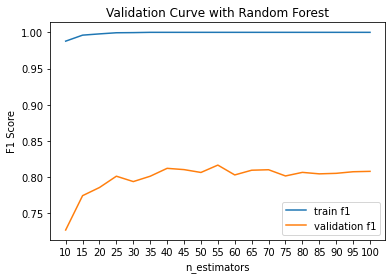

In [ ]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=1), X_train, y_train, param_name="n_estimators", param_range=n_estimators, scoring='f1', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("F1 Score")
plt.xticks(np.arange(10,105,step=5))
plt.plot(n_estimators, train_scores_mean, label="train f1")
plt.plot(n_estimators, valid_scores_mean, label="validation f1")

plt.legend()
plt.show()

[0.09893717 0.06475081 0.0764921  0.07648663 0.08151771 0.08627151
 0.08778752 0.09073355 0.07895281 0.06795139 0.07545484 0.06241328
 0.06721315 0.07429631 0.07146142 0.07066385 0.07171814 0.07613502
 0.06771855]


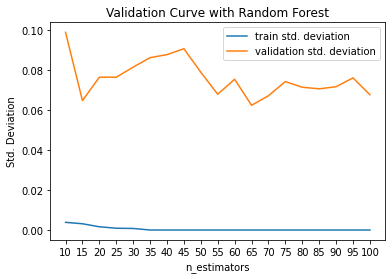

In [ ]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=1), X_train, y_train, param_name="n_estimators", param_range=n_estimators, scoring='f1', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Std. Deviation")
plt.xticks(np.arange(10,105,step=5))
plt.plot(n_estimators, train_scores_std, label="train std. deviation")
plt.plot(n_estimators, valid_scores_std, label="validation std. deviation")

plt.legend()
plt.show()

In [ ]:
RF = RandomForestClassifier(random_state=1, n_estimators=100)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

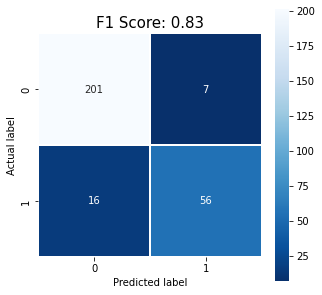

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'F1 Score: {0}'.format(round(f1_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [ ]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  56 
FP:  7 
TN:  201 
FN:  16

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       208
           1       0.89      0.78      0.83        72

    accuracy                           0.92       280
   macro avg       0.91      0.87      0.89       280
weighted avg       0.92      0.92      0.92       280



# ANOVA F-test

In [ ]:
X = featuresFC.iloc[:,0:20]
y = featuresFC['Playoffs']

In [ ]:
featuresFC.iloc[:,0:20].head()

,ERA+,OPS+,RA/G,R/G,1Run,SV,H_P,#a-tA-S,BB_P,BB,Rtot,DefEff,PA,Under500,HR,SF,E,IP,SOS,IBB_P
0,0.173913,0.44,0.477612,0.339394,0.559387,0.302094,0.622353,0.45,0.429180,0.465585,0.391473,0.602041,0.594126,0.402703,0.380797,0.358281,0.743973,0.678982,0.545455,0.495551
1,0.637681,0.32,0.000000,0.133333,0.390805,0.194577,0.181001,0.65,0.154861,0.410213,0.841085,1.000000,0.356231,0.389189,0.213898,0.398932,0.349282,0.697641,0.454545,0.471563
2,0.231884,0.56,0.300995,0.363636,0.641762,0.265422,0.464920,0.75,0.429180,0.440077,0.372093,0.581633,0.523644,0.385135,0.303797,0.538171,0.558574,0.710241,0.454545,0.441491
3,0.275362,0.36,0.161692,0.000000,0.618774,0.100396,0.159225,0.40,0.688073,0.021753,0.569767,0.867347,0.279588,0.271622,0.126699,0.124424,0.444482,0.680184,0.454545,0.477531
4,0.594203,0.46,0.208955,0.442424,0.392720,0.390013,0.482468,0.60,0.204570,0.540521,0.441860,0.663265,0.566620,0.528378,0.335165,0.443268,0.566802,0.752545,0.363636,0.501326


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

[0.74389622 0.7795246  0.77958606 0.80092258 0.79224219 0.78623199
 0.78787656 0.79781815 0.79226751 0.79914508 0.80206373 0.80240211
 0.80504349 0.8040459  0.80025461 0.80632611 0.80609527 0.80830148
 0.80408189]


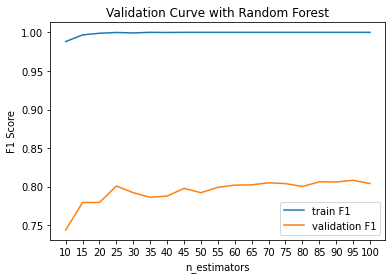

In [ ]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=1), X_train, y_train, param_name="n_estimators", param_range=n_estimators, scoring='f1', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("F1 Score")
plt.xticks(np.arange(10,105,step=5))
plt.plot(n_estimators, train_scores_mean, label="train F1")
plt.plot(n_estimators, valid_scores_mean, label="validation F1")

plt.legend()
plt.show()

[0.0727835  0.08262158 0.06983619 0.06956043 0.0791565  0.06946607
 0.07043088 0.0700737  0.07430854 0.06859519 0.06673675 0.066847
 0.07534981 0.07197964 0.07725169 0.06655199 0.07277599 0.06466768
 0.06827151]


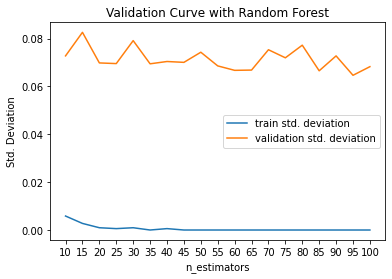

In [ ]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=1), X_train, y_train, param_name="n_estimators", param_range=n_estimators, scoring='f1', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Std. Deviation")
plt.xticks(np.arange(10,105,step=5))
plt.plot(n_estimators, train_scores_std, label="train std. deviation")
plt.plot(n_estimators, valid_scores_std, label="validation std. deviation")

plt.legend()
plt.show()

In [ ]:
RF = RandomForestClassifier(random_state=1, n_estimators=95)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

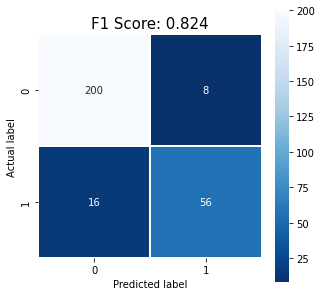

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'F1 Score: {0}'.format(round(f1_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [ ]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  56 
FP:  8 
TN:  200 
FN:  16

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       208
           1       0.88      0.78      0.82        72

    accuracy                           0.91       280
   macro avg       0.90      0.87      0.88       280
weighted avg       0.91      0.91      0.91       280



# Random Forest

In [ ]:
X = featuresRFC.iloc[:,0:20]
y = featuresRFC['Playoffs']

In [ ]:
featuresRFC.iloc[:,0:20].head()

,ERA+,RA/G,1Run,R/G,OPS+,SV,H_P,BB_P,BB,DefEff,Rtot,HR,#a-tA-S,IP,SOS,PA,HR_P,SF,2B,Under500
0,0.173913,0.477612,0.559387,0.339394,0.44,0.302094,0.622353,0.429180,0.465585,0.602041,0.391473,0.380797,0.45,0.678982,0.545455,0.594126,0.418914,0.358281,0.151402,0.402703
1,0.637681,0.000000,0.390805,0.133333,0.32,0.194577,0.181001,0.154861,0.410213,1.000000,0.841085,0.213898,0.65,0.697641,0.454545,0.356231,0.123964,0.398932,0.191710,0.389189
2,0.231884,0.300995,0.641762,0.363636,0.56,0.265422,0.464920,0.429180,0.440077,0.581633,0.372093,0.303797,0.75,0.710241,0.454545,0.523644,0.189573,0.538171,0.361411,0.385135
3,0.275362,0.161692,0.618774,0.000000,0.36,0.100396,0.159225,0.688073,0.021753,0.867347,0.569767,0.126699,0.40,0.680184,0.454545,0.279588,0.142855,0.124424,0.078143,0.271622
4,0.594203,0.208955,0.392720,0.442424,0.46,0.390013,0.482468,0.204570,0.540521,0.663265,0.441860,0.335165,0.60,0.752545,0.363636,0.566620,0.233241,0.443268,0.242631,0.528378


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

[0.76250923 0.8048455  0.78867351 0.80576499 0.80555535 0.7999216
 0.80688917 0.8158639  0.80853202 0.81508851 0.81608986 0.81599237
 0.81792287 0.81370436 0.80971346 0.80940928 0.80992921 0.80846188
 0.80499108]


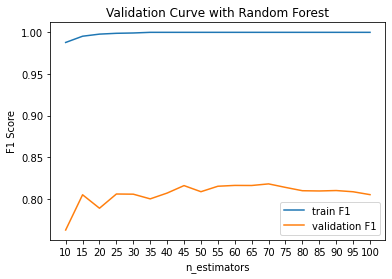

In [ ]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=1), X_train, y_train, param_name="n_estimators", param_range=n_estimators, scoring='f1', cv=10)
train_scores_mean = np.mean(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)

print(valid_scores_mean)
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("F1 Score")
plt.xticks(np.arange(10,105,step=5))
plt.plot(n_estimators, train_scores_mean, label="train F1")
plt.plot(n_estimators, valid_scores_mean, label="validation F1")

plt.legend()
plt.show()

[0.05851683 0.04855409 0.0756404  0.0666062  0.0689507  0.06851683
 0.06596398 0.04942261 0.06159713 0.06283382 0.06356071 0.0656398
 0.05905561 0.06146309 0.06778588 0.07381071 0.07440108 0.06654187
 0.07317817]


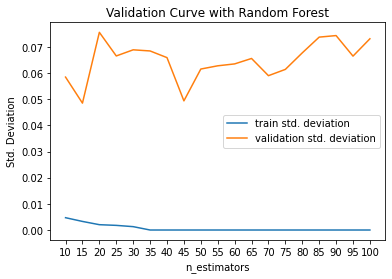

In [ ]:
train_scores, valid_scores = validation_curve(RandomForestClassifier(random_state=1), X_train, y_train, param_name="n_estimators", param_range=n_estimators, scoring='f1', cv=10)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

print(valid_scores_std)
plt.title("Validation Curve with Random Forest")
plt.xlabel("n_estimators")
plt.ylabel("Std. Deviation")
plt.xticks(np.arange(10,105,step=5))
plt.plot(n_estimators, train_scores_std, label="train std. deviation")
plt.plot(n_estimators, valid_scores_std, label="validation std. deviation")

plt.legend()
plt.show()

In [ ]:
RF = RandomForestClassifier(random_state=1, n_estimators=70)
RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

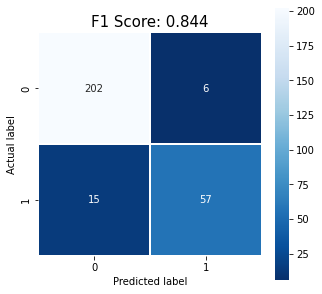

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'F1 Score: {0}'.format(round(f1_score(y_test, y_pred),3))
plt.title(all_sample_title, size = 15);

In [ ]:
tn, fp, fn, tp=cm.ravel()
print ("TP: ", tp,"\n" "FP: ",fp,"\n" "TN: ", tn,"\n" "FN: ",fn)
print()
print(classification_report(y_test, y_pred))

TP:  57 
FP:  6 
TN:  202 
FN:  15

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       208
           1       0.90      0.79      0.84        72

    accuracy                           0.93       280
   macro avg       0.92      0.88      0.90       280
weighted avg       0.92      0.93      0.92       280

